# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
# Import API key
import api_keys
import pprint
import json
import os
import csv

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [2]:
## Generate Cities List

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# List for holding lat_lngs and cities
lat_lngs = []
cities = []
count_cities=0
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)


In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        # Open the file using "write" mode. Specify the variable to hold the contents
        with open('cities.csv', 'w', newline='') as csvfile:

            # Initialize csv.writer
            csvwriter = csv.writer(csvfile, delimiter=',')
            count_cities= count_cities+1
            # Write the second row
            csvwriter.writerow(cities)

# Print the city count to confirm sufficient count



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key="1e1338f5634034d7478449e25e8f8529"
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
count=0
# set up lists to hold reponse info
city_name=[]
cloudiness=[]
country=[]
city_date=[]
humidity=[]
lat = []
lon = []
max_temp=[]
wind_speed=[]
temp = []
city_temp=[]


In [5]:
count=0
# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    response = requests.get(query_url + city).json()
    if response['main'] is None:
        print("none")
    else:
        count +=1
        print(count)
        print(city)
        #print(json.dumps(response, indent=4,sort_keys=True))

        #Send Data to lists
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        city_date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        temp.append(response['main']['temp'])
        print("end")

print("hi")
#print(f"The latitude information received is: {lat}")
#print(f"The temperature information received is: {temp}")

1
rikitea
end
2
georgetown
end
3
hobart
end
4
luena
end
5
sinnamary
end
6
kattivakkam
end
7
kikwit
end
8
kapaa
end
9
kaseda
end
10
bose
end
11
plateros
end
12
hasaki
end
13
araouane
end
14
hithadhoo
end
15
east london
end
16
arraial do cabo
end
17
ixtapa
end
18
khatanga
end
19
ulaangom
end
20
chuy
end


KeyError: 'main'

In [6]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": city_name,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":city_date,
    "Humidity":humidity,
    "Lat": lat,
    "Lng":lon,
    "Max Temp":max_temp,
    "Wind Speed": wind_speed,
    "temp": max_temp
}
weather_data = pd.DataFrame(weather_dict)

In [9]:
weather_data.head(25)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,temp
0,Rikitea,12,PF,1541710749,100,-23.12,-134.97,22.79,2.42,22.79
1,Georgetown,40,GY,1541707200,74,6.80,-58.16,30.00,7.20,30.00
2,Hobart,75,AU,1541709000,53,-42.88,147.33,11.00,4.60,11.00
3,Luena,76,AO,1541710750,98,-11.78,19.91,17.14,2.07,17.14
4,Sinnamary,44,GF,1541710750,93,5.38,-52.96,28.11,5.92,28.11
5,Kattivakkam,40,IN,1541709000,94,13.22,80.32,25.00,1.50,25.00
6,Kikwit,92,CD,1541710750,92,-5.04,18.82,23.79,1.77,23.79
7,Kapaa,40,US,1541706960,65,22.08,-159.32,28.30,2.60,28.30
8,Kaseda,75,JP,1541706120,88,31.42,130.32,20.00,4.10,20.00
9,Bose,75,IT,1541708400,100,45.46,8.01,13.00,1.50,13.00


In [10]:
weather_data=pd.DataFrame(weather_dict)
weather_data.count()


City          20
Cloudiness    20
Country       20
Date          20
Humidity      20
Lat           20
Lng           20
Max Temp      20
Wind Speed    20
temp          20
dtype: int64

#### Latitude vs. Temperature Plot

In [11]:
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed,temp
0,Rikitea,12,PF,1541710749,100,-23.12,-134.97,22.79,2.42,22.79
1,Georgetown,40,GY,1541707200,74,6.80,-58.16,30.00,7.20,30.00
2,Hobart,75,AU,1541709000,53,-42.88,147.33,11.00,4.60,11.00
3,Luena,76,AO,1541710750,98,-11.78,19.91,17.14,2.07,17.14
4,Sinnamary,44,GF,1541710750,93,5.38,-52.96,28.11,5.92,28.11
5,Kattivakkam,40,IN,1541709000,94,13.22,80.32,25.00,1.50,25.00
6,Kikwit,92,CD,1541710750,92,-5.04,18.82,23.79,1.77,23.79
7,Kapaa,40,US,1541706960,65,22.08,-159.32,28.30,2.60,28.30
8,Kaseda,75,JP,1541706120,88,31.42,130.32,20.00,4.10,20.00
9,Bose,75,IT,1541708400,100,45.46,8.01,13.00,1.50,13.00


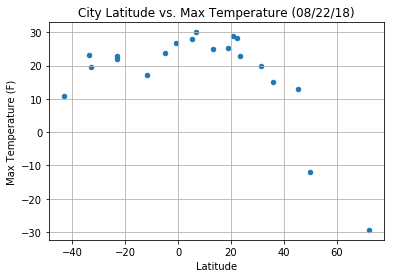

In [12]:
Lat_Temp_chart=weather_data.plot.scatter(x='Lat',y='Max Temp')
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
Lat_Temp_chart.grid()

# Latitude vs. Humidity Plot

In [ ]:
Lat_Humit_chart=weather_data.plot.scatter(x='Lat',
                                y='Humidity')
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
Lat_Humit_chart.grid()

#### Latitude vs. Cloudiness Plot

In [ ]:
Lat_Humit_chart=weather_data.plot.scatter(x='Lat',
                                y='Cloudiness')
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
Lat_Humit_chart.grid()

#### Latitude vs. Wind Speed Plot

In [ ]:
Lat_Humit_chart=weather_data.plot.scatter(x='Lat',
                                y='Wind Speed',
                                c='DarkBlue')
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
Lat_Humit_chart.grid()